**Please insert your full name:mahdi_manouchehri**

**And your student number: 400211592 **


<b>Background</b>: 

Single-cell RNA-Seq (scRNA-Seq) data is incredibly noisy and sparse, with only a fraction of
transcribed RNAs captured in the sequencing due to the difficulty in amplifying such a small signal from a
single cell. Specifically, there are many genes expressed in a cell at any given time, and two entirely different
scRNA-Seq readings could come from cells with identical expression profiles.
In this assignment, you will explore utilizing autoencoders to identify clusters of cells from the counts data.
These clusters could represent varying expression profiles in the same tissue sample, such as the unique profiles
that you might see in different phases of the cell cycle or different cell types.


<b>Dataset</b>: 

 The data provided will be in the form of normalized log counts across 1000 genes
for 5000 cells provided for you in folder.

[dataset](https://drive.google.com/drive/folders/1zVHK09eZkjztrncyNQ_mgc31utsYSyf7?usp=sharing)



In [1]:
!pip install torchvision

In [2]:
import os
import sys
import numpy as np
import argparse

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import torch
from torch import nn
from torch.utils.data import DataLoader

import pandas as pd

## P01

Train an Autoencoder (composed of fully-connected layers) to learn a low-level gene expression representation of the cells from the scRNA-Seq counts

**P01-A** : Use latent embedding (embedding learned by the bottleneck layer) sizes of 5, 10, 50, and 100. This is the size of the output of the encoder, and the input to the decoder. Also, follow the implementation notes


**P01-B** : Report and compare the reconstruction Mean Squared Error (MSE) for each latent embedding size. How does the size of the latent space affect the reconstruction MSE?

In [3]:
import numpy as np

data_gen_exp = np.load('C:/Users/jahannama/Desktop/ml/ml_4/counts.npy')
data_labels = np.loadtxt('C:/Users/jahannama/Desktop/ml/ml_4/labels.txt')

In [4]:
import torch
import torchvision
from torchvision import transforms
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([-0.5], [0.5])
])

data1 = data_gen_exp/data_gen_exp.max()
print(data1.max())
data1 = img_transform(data1)

# DataLoader is used to load the dataset 
# for training
loader = torch.utils.data.DataLoader(dataset = data1,batch_size = 5000,shuffle = True)

1.0


In [5]:
class AE1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 150),
  
            torch.nn.ReLU(),
            torch.nn.Linear(150, 100),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(100, 150),

            torch.nn.ReLU(),
            torch.nn.Linear(150, 200),
 
            torch.nn.ReLU(),
            torch.nn.Linear(200, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

##
# Model Initialization
model1 = AE1()

In [6]:
class AE2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(


            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 100),
  
            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(50, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 200),
 
            torch.nn.ReLU(),
            torch.nn.Linear(200, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

##
# Model Initialization
model2 = AE2()

In [7]:
class AE3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(


            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
  
            torch.nn.ReLU(),
            torch.nn.Linear(50, 10),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 50),

            torch.nn.ReLU(),
            torch.nn.Linear(50, 100),
 
            torch.nn.ReLU(),
            torch.nn.Linear(100, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

##
# Model Initialization
model3 = AE3()

In [8]:
class AE4(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(1000, 500),
            
            torch.nn.ReLU(),
            torch.nn.Linear(500, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),

            torch.nn.ReLU(),
            torch.nn.Linear(50, 5),
        )
        
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(5, 50),

            torch.nn.ReLU(),
            torch.nn.Linear(50, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

            
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

##
# Model Initialization
model4 = AE4()

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.001)

In [10]:
# number of epochs to train the model
n_epochs = 100


for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        images = arr     
        # clear the gradients of all optimized variables
        optimizer1.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs1 = model1(images)
        # calculate the loss
        loss = criterion(outputs1, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer1.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
    ))

Epoch: 1 	Training Loss: 1.254101
Epoch: 2 	Training Loss: 1.248474
Epoch: 3 	Training Loss: 1.240903
Epoch: 4 	Training Loss: 1.225923
Epoch: 5 	Training Loss: 1.189452
Epoch: 6 	Training Loss: 1.100632
Epoch: 7 	Training Loss: 0.913044
Epoch: 8 	Training Loss: 0.651480
Epoch: 9 	Training Loss: 0.514504
Epoch: 10 	Training Loss: 0.502549
Epoch: 11 	Training Loss: 0.502398
Epoch: 12 	Training Loss: 0.502398
Epoch: 13 	Training Loss: 0.502398
Epoch: 14 	Training Loss: 0.502398
Epoch: 15 	Training Loss: 0.502398
Epoch: 16 	Training Loss: 0.502398
Epoch: 17 	Training Loss: 0.502398
Epoch: 18 	Training Loss: 0.502398
Epoch: 19 	Training Loss: 0.502398
Epoch: 20 	Training Loss: 0.502398
Epoch: 21 	Training Loss: 0.502398
Epoch: 22 	Training Loss: 0.502398
Epoch: 23 	Training Loss: 0.502398
Epoch: 24 	Training Loss: 0.502398
Epoch: 25 	Training Loss: 0.502398
Epoch: 26 	Training Loss: 0.502398
Epoch: 27 	Training Loss: 0.502398
Epoch: 28 	Training Loss: 0.502398
Epoch: 29 	Training Loss: 0.5

In [11]:
# number of epochs to train the model
n_epochs = 100


for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        images = arr     
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs2 = model2(images)
        # calculate the loss
        loss = criterion(outputs2, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.252501
Epoch: 2 	Training Loss: 1.246639
Epoch: 3 	Training Loss: 1.238676
Epoch: 4 	Training Loss: 1.223219
Epoch: 5 	Training Loss: 1.187476
Epoch: 6 	Training Loss: 1.104354
Epoch: 7 	Training Loss: 0.934156
Epoch: 8 	Training Loss: 0.688061
Epoch: 9 	Training Loss: 0.527360
Epoch: 10 	Training Loss: 0.503022
Epoch: 11 	Training Loss: 0.502400
Epoch: 12 	Training Loss: 0.502398
Epoch: 13 	Training Loss: 0.502398
Epoch: 14 	Training Loss: 0.502398
Epoch: 15 	Training Loss: 0.502398
Epoch: 16 	Training Loss: 0.502398
Epoch: 17 	Training Loss: 0.502398
Epoch: 18 	Training Loss: 0.502398
Epoch: 19 	Training Loss: 0.502398
Epoch: 20 	Training Loss: 0.502398
Epoch: 21 	Training Loss: 0.502398
Epoch: 22 	Training Loss: 0.502398
Epoch: 23 	Training Loss: 0.502398
Epoch: 24 	Training Loss: 0.502398
Epoch: 25 	Training Loss: 0.502398
Epoch: 26 	Training Loss: 0.502398
Epoch: 27 	Training Loss: 0.502398
Epoch: 28 	Training Loss: 0.502398
Epoch: 29 	Training Loss: 0.5

In [12]:
# number of epochs to train the model
n_epochs = 100


for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        images = arr     
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs3 = model3(images)
        # calculate the loss
        loss = criterion(outputs3, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.252444
Epoch: 2 	Training Loss: 1.245298
Epoch: 3 	Training Loss: 1.236026
Epoch: 4 	Training Loss: 1.221961
Epoch: 5 	Training Loss: 1.198220
Epoch: 6 	Training Loss: 1.156794
Epoch: 7 	Training Loss: 1.083835
Epoch: 8 	Training Loss: 0.962408
Epoch: 9 	Training Loss: 0.788551
Epoch: 10 	Training Loss: 0.613001
Epoch: 11 	Training Loss: 0.521155
Epoch: 12 	Training Loss: 0.503527
Epoch: 13 	Training Loss: 0.502423
Epoch: 14 	Training Loss: 0.502398
Epoch: 15 	Training Loss: 0.502398
Epoch: 16 	Training Loss: 0.502398
Epoch: 17 	Training Loss: 0.502398
Epoch: 18 	Training Loss: 0.502398
Epoch: 19 	Training Loss: 0.502398
Epoch: 20 	Training Loss: 0.502398
Epoch: 21 	Training Loss: 0.502398
Epoch: 22 	Training Loss: 0.502398
Epoch: 23 	Training Loss: 0.502398
Epoch: 24 	Training Loss: 0.502398
Epoch: 25 	Training Loss: 0.502398
Epoch: 26 	Training Loss: 0.502398
Epoch: 27 	Training Loss: 0.502398
Epoch: 28 	Training Loss: 0.502398
Epoch: 29 	Training Loss: 0.5

In [13]:
# number of epochs to train the model
n_epochs = 100


for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        images = arr     
        # clear the gradients of all optimized variables
        optimizer4.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs4 = model4(images)
        # calculate the loss
        loss = criterion(outputs4, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer4.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 1.252696
Epoch: 2 	Training Loss: 1.245438
Epoch: 3 	Training Loss: 1.237026
Epoch: 4 	Training Loss: 1.226071
Epoch: 5 	Training Loss: 1.211220
Epoch: 6 	Training Loss: 1.190255
Epoch: 7 	Training Loss: 1.158905
Epoch: 8 	Training Loss: 1.108694
Epoch: 9 	Training Loss: 1.029573
Epoch: 10 	Training Loss: 0.910477
Epoch: 11 	Training Loss: 0.754187
Epoch: 12 	Training Loss: 0.602679
Epoch: 13 	Training Loss: 0.521459
Epoch: 14 	Training Loss: 0.503841
Epoch: 15 	Training Loss: 0.502440
Epoch: 16 	Training Loss: 0.502398
Epoch: 17 	Training Loss: 0.502398
Epoch: 18 	Training Loss: 0.502398
Epoch: 19 	Training Loss: 0.502398
Epoch: 20 	Training Loss: 0.502398
Epoch: 21 	Training Loss: 0.502398
Epoch: 22 	Training Loss: 0.502398
Epoch: 23 	Training Loss: 0.502398
Epoch: 24 	Training Loss: 0.502398
Epoch: 25 	Training Loss: 0.502398
Epoch: 26 	Training Loss: 0.502398
Epoch: 27 	Training Loss: 0.502398
Epoch: 28 	Training Loss: 0.502398
Epoch: 29 	Training Loss: 0.5

## P02

Analyze the learned encodings.produce PCA & t-SNE plots of the raw scRNA-Seq counts.


**P02-A** : make PCA & t-SNE plots of the autoencoder reconstructions.

**P02-B** : Compare and report the plots of the original data with the plots of the reconstructions. How do the PCA & t-SNE plots of the reconstructions compare with those of the original data?

**P02-C** : Take the trained encoders of the previous autoencoders and make PCA & t-SNE plots of the latent embedding vectors. Remember to make and submit plots for all 4 autoencoders (latent embedding sizes - 5, 10, 50, and 100). How does the size of the latent space affect the latent vector plots?

**P02-D** : Compare and report the plots of the original data and the plots of the latent vectors. How do the various embedding sizes change the quality of clustering?

In [14]:
rec1= outputs1.detach().numpy() 
rec1 = rec1.reshape(5000,1000)
print(rec1.shape)

(5000, 1000)


In [15]:
rec2= outputs2.detach().numpy() 
rec2 = rec2.reshape(5000,1000)
print(rec2.shape)

(5000, 1000)


In [16]:
rec3= outputs3.detach().numpy() 
rec3 = rec3.reshape(5000,1000)
print(rec3.shape)

(5000, 1000)


In [17]:
rec4= outputs4.detach().numpy() 
rec4 = rec4.reshape(5000,1000)
print(rec4.shape)

(5000, 1000)


In [18]:
colors = ['red', 'blue', 'green', 'yellow', 'black']

C:\Users\jahannama\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


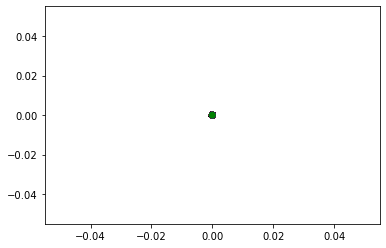

In [19]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2 = pca.fit_transform(rec1)
# print(X2.shape)
# #############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

C:\Users\jahannama\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


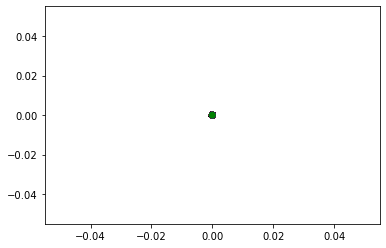

In [20]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(rec2)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

C:\Users\jahannama\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


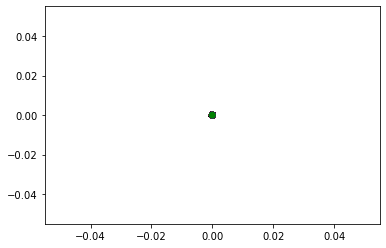

In [21]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(rec3)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

C:\Users\jahannama\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


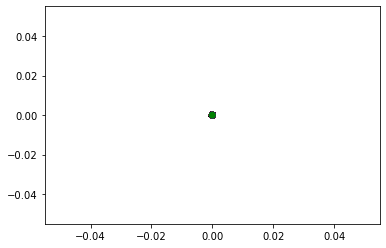

In [22]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(rec4)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

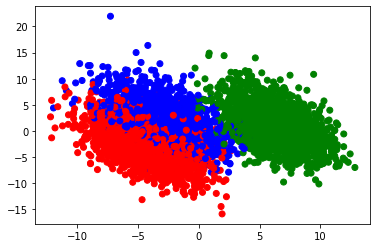

In [23]:
plt.show()
#%%
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(data_gen_exp)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.011s...
[t-SNE] Computed neighbors for 5000 samples in 2.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.967506
[t-SNE] KL divergence after 800 iterations: 3.139129
(5000, 2)


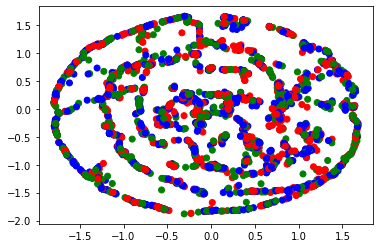

In [24]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(rec1) 
print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 2.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.967506
[t-SNE] KL divergence after 800 iterations: 3.139129
(5000, 2)


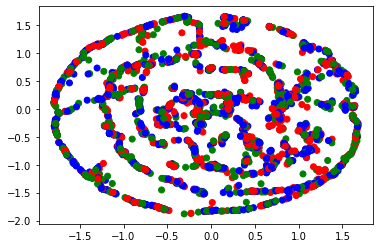

In [25]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(rec2) 
print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.013s...
[t-SNE] Computed neighbors for 5000 samples in 2.582s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.967506
[t-SNE] KL divergence after 800 iterations: 3.139129


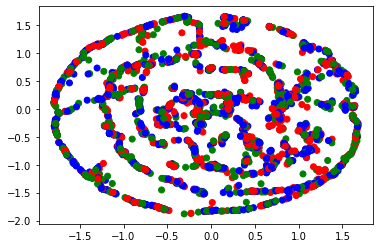

In [26]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(rec3) 
# print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.011s...
[t-SNE] Computed neighbors for 5000 samples in 2.623s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 121.967506
[t-SNE] KL divergence after 800 iterations: 3.139129


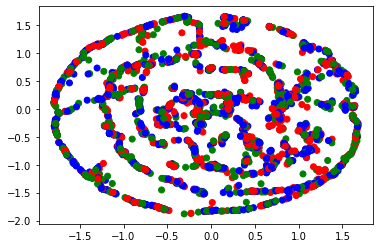

In [27]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(rec4) 
# print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.012s...
[t-SNE] Computed neighbors for 5000 samples in 3.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 9.035917
[t-SNE] KL divergence after 250 iterations with early exaggeration: 135.474869
[t-SNE] KL divergence after 1000 iterations: 4.092309


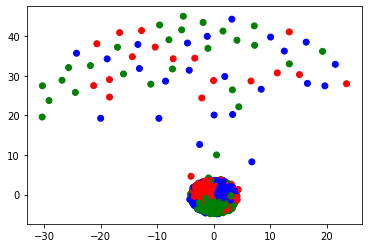

In [28]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(data_gen_exp) 
# print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

## P02-C

In [29]:

class E1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(


            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 150),
  
            torch.nn.ReLU(),
            torch.nn.Linear(150, 100),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(100, 150),

            torch.nn.ReLU(),
            torch.nn.Linear(150, 200),
 
            torch.nn.ReLU(),
            torch.nn.Linear(200, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded

##
# Model Initialization
model11 = E1()

In [30]:
class E2(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(


            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 100),
  
            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(50, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 200),
 
            torch.nn.ReLU(),
            torch.nn.Linear(200, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded

##
# Model Initialization
model12 = E2()

In [31]:
class E3(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(


            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
  
            torch.nn.ReLU(),
            torch.nn.Linear(50, 10),
        )
        
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
    
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 50),

            torch.nn.ReLU(),
            torch.nn.Linear(50, 100),
 
            torch.nn.ReLU(),
            torch.nn.Linear(100, 300),

            torch.nn.ReLU(),
            torch.nn.Linear(300, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded

##
# Model Initialization
model13 = E3()

In [32]:
class E4(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        # Building an linear encoder with Linear
        # layer followed by Relu activation function

        self.encoder = torch.nn.Sequential(


            torch.nn.Linear(1000, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 100),

            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
  
            torch.nn.ReLU(),
            torch.nn.Linear(50, 5),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(5, 50),

            torch.nn.ReLU(),
            torch.nn.Linear(50, 100),
 
            torch.nn.ReLU(),
            torch.nn.Linear(100, 200),

            torch.nn.ReLU(),
            torch.nn.Linear(200, 500),

            torch.nn.ReLU(),
            torch.nn.Linear(500, 1000),

            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded

##
# Model Initialization
model14 = E4()

In [33]:
for arr in loader:
  images = arr   
  recons1 = model11(images)
  recons2 = model12(images)
  recons3 = model13(images)
  recons4 = model14(images)

In [34]:
r1= recons1.detach().numpy() 
r1 = r1.reshape(5000,100)

r2= recons2.detach().numpy() 
r2 = r2.reshape(5000,50)

r3= recons3.detach().numpy() 
r3 = r3.reshape(5000,10)

r4= recons4.detach().numpy() 
r4 = r4.reshape(5000,5)

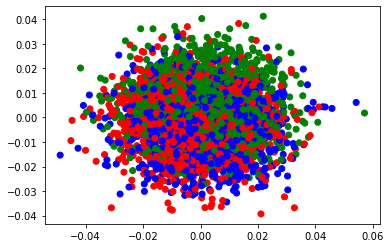

In [35]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(r1)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

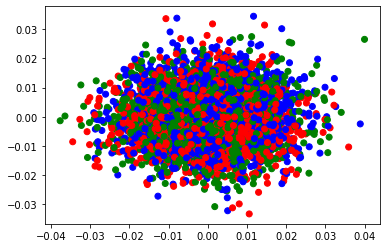

In [36]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(r2)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

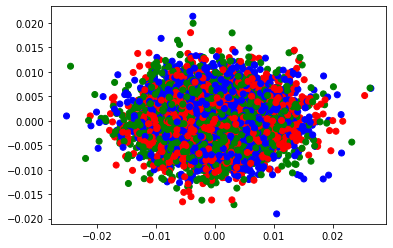

In [37]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(r3)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

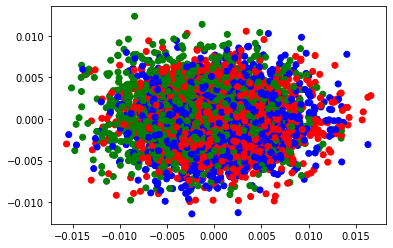

In [38]:
##### ToDo: Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(r4)
# print(X2.shape)
#############
df = pd.DataFrame(X2,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 1.731s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.010621
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.393082
[t-SNE] KL divergence after 1000 iterations: 3.394029
(5000, 2)


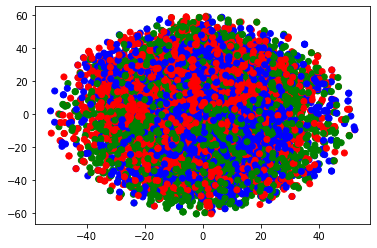

In [39]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(r1) 
print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.001s...
[t-SNE] Computed neighbors for 5000 samples in 1.845s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.007971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.395920
[t-SNE] KL divergence after 1000 iterations: 3.243123
(5000, 2)


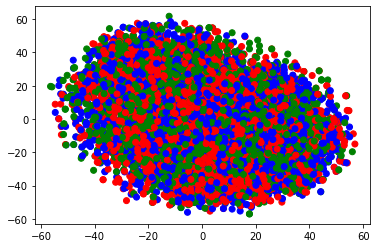

In [40]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(r2) 
print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.035s...
[t-SNE] Computed neighbors for 5000 samples in 1.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.003066
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.206543
[t-SNE] KL divergence after 1000 iterations: 2.483582
(5000, 2)


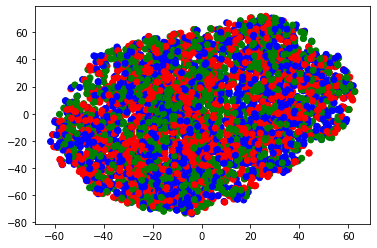

In [41]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(r3) 
print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.017s...
[t-SNE] Computed neighbors for 5000 samples in 0.538s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.001548
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.128754
[t-SNE] KL divergence after 1000 iterations: 1.960290
(5000, 2)


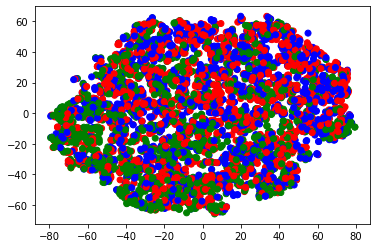

In [42]:
##### ToDo: Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
X3 = tsne.fit_transform(r4) 
print(X3.shape)
#############
df = pd.DataFrame(X3,columns=['feature_1','feature_2'])
    
df['labels'] = data_labels

classes = np.unique(data_labels)

color_map = {class_:color for class_, color in zip(classes, colors)}
    
plt.scatter(df['feature_1'], df['feature_2'],c=list(df['labels'].map(color_map).values))
plt.show()

## P03

Convert your autoencoder to a denoising autoencoder. (Reconstruction loss is calculated using the original input without the added noise.)

**P03-A** : Add Gaussian noise to the input data and train the denoising autoencoder to remove the added artifical noise.

**P03-B** : Add negative binomial distribution (zero-inflated negative binomial) noise to the input data and train the denoising autoencoder to remove the added artificial noise.

**P03-C** : For each of the above, compare and report the PCA plots of the original data and the plots of the latent vectors. Is the de-noising autoencoder able to remove the artificial noise in your data?

In [43]:
# number of epochs to train the model
n_epochs = 7

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        # _ stands in for labels, here
        # no need to flatten images
        images = arr
        ## add random noise to the input images

        noisy_imgs1 = images + (0.1**0.5)*torch.randn(1,5000,1000)
        # Clip the images to be between 0 and 1
        #####noisy_imgs = np.clip(noisy_imgs, 0., 1.)      
        # clear the gradients of all optimized variables
        optimizer1.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs1 = model1(noisy_imgs1)
        #xx  = torch.stack(list(outputs), dim=0)
        
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs1, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer1.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.502398
Epoch: 2 	Training Loss: 0.502398
Epoch: 3 	Training Loss: 0.502398
Epoch: 4 	Training Loss: 0.502398
Epoch: 5 	Training Loss: 0.502398
Epoch: 6 	Training Loss: 0.502398
Epoch: 7 	Training Loss: 0.502398


In [44]:
# number of epochs to train the model
n_epochs = 7

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        # _ stands in for labels, here
        # no need to flatten images
        images = arr
        ## add random noise to the input images

        noisy_imgs2 = images + (0.1**0.5)*torch.randn(1,5000,1000)
        # Clip the images to be between 0 and 1
        #####noisy_imgs = np.clip(noisy_imgs, 0., 1.)      
        # clear the gradients of all optimized variables
        optimizer2.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs2 = model2(noisy_imgs2)
        #xx  = torch.stack(list(outputs), dim=0)
        
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs2, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer2.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.502398
Epoch: 2 	Training Loss: 0.502398
Epoch: 3 	Training Loss: 0.502398
Epoch: 4 	Training Loss: 0.502398
Epoch: 5 	Training Loss: 0.502398
Epoch: 6 	Training Loss: 0.502398
Epoch: 7 	Training Loss: 0.502398


In [45]:
# number of epochs to train the model
n_epochs = 7

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        # _ stands in for labels, here
        # no need to flatten images
        images = arr
        ## add random noise to the input images

        noisy_imgs3 = images + (0.1**0.5)*torch.randn(1,5000,1000)
        # Clip the images to be between 0 and 1
        #####noisy_imgs = np.clip(noisy_imgs, 0., 1.)      
        # clear the gradients of all optimized variables
        optimizer3.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs3 = model3(noisy_imgs3)
        #xx  = torch.stack(list(outputs), dim=0)
        
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs3, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer3.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.502398
Epoch: 2 	Training Loss: 0.502398
Epoch: 3 	Training Loss: 0.502398
Epoch: 4 	Training Loss: 0.502398
Epoch: 5 	Training Loss: 0.502398
Epoch: 6 	Training Loss: 0.502398
Epoch: 7 	Training Loss: 0.502398


In [46]:
# number of epochs to train the model
n_epochs = 7

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for arr in loader:
        # _ stands in for labels, here
        # no need to flatten images
        images = arr
        ## add random noise to the input images

        noisy_imgs4 = images + (0.1**0.5)*torch.randn(1,5000,1000)
        # Clip the images to be between 0 and 1
        #####noisy_imgs = np.clip(noisy_imgs, 0., 1.)      
        # clear the gradients of all optimized variables
        optimizer4.zero_grad()
        ## forward pass: compute predicted outputs by passing *noisy* images to the model
        outputs4 = model4(noisy_imgs4)
        #xx  = torch.stack(list(outputs), dim=0)
        
        # calculate the loss
        # the "target" is still the original, not-noisy images
        loss = criterion(outputs4, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer4.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.502398
Epoch: 2 	Training Loss: 0.502398
Epoch: 3 	Training Loss: 0.502398
Epoch: 4 	Training Loss: 0.502398
Epoch: 5 	Training Loss: 0.502398
Epoch: 6 	Training Loss: 0.502398
Epoch: 7 	Training Loss: 0.502398
